# **Preprocessing**

Class Proportions:
Normal: 1589 Osteoarthritis: 2026


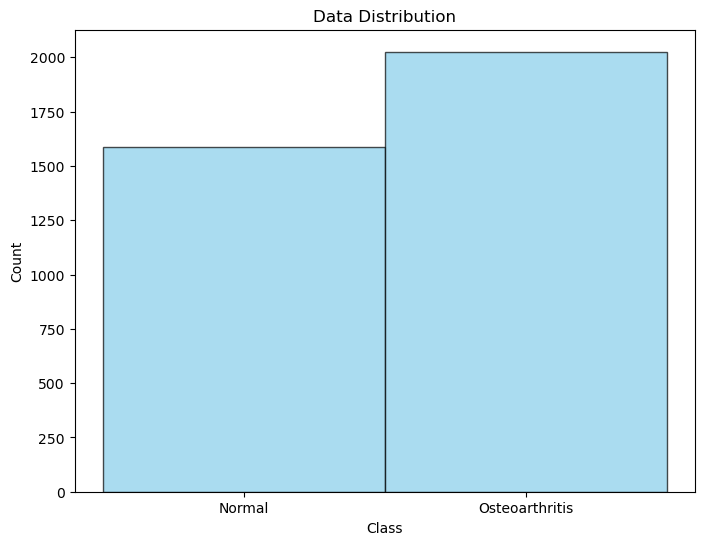

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data_path =r"C:\Users\jahna\OneDrive\Documents\ML DOC\PAPERS\OSTEO ARTHEITIS\LITERTURE_OSTEO\LITERTURE_OSTEO\RESULTS\Osteoarthritis\combined\combined"
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (Normal and Tuberculosis)
for class_name in ['Normal', 'Osteoarthritis']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for Normal, 1 for Tuberculosis) to the labels list
        labels.append(0 if class_name == 'Normal' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print class proportions
print("Class Proportions:")
print("Normal:", np.sum(labels == 0), "Osteoarthritis:", np.sum(labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'Osteoarthritis'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()

In [2]:

# Split the data into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

#print the balanced data
print("Images:",images.shape)
print("Balanced labels:",labels.shape)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)

Images: (3615, 224, 224)
Balanced labels: (3615,)
X_train shape: (2602, 224, 224)
X_test shape: (723, 224, 224)
y_train shape: (2602,)
y_test shape: (723,)
X_valid shape: (290, 224, 224)
y_valid shape: (290,)


C:\Users\jahna\AppData\Local\Temp\ipykernel_25532\3764948175.py:27: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, None, None, 3)     │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1 (Conv2D)                │ (None, None, None, 32)    │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, None, None, 32)    │             128 │ conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (ReLU)             │ (None, None, None, 32)    │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_dw_1 (DepthwiseConv2D)   │ (None, None, None, 32)    │             288 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_dw_1_bn                  │ (None, None, None, 32)    │             128 │ conv_dw_1[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_dw_1_relu (ReLU)         │ (None, None, None, 32)    │               0 │ conv_dw_1_bn[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_pw_1 (Conv2D)            │ (None, None, None, 64)    │           2,048 │ conv_dw_1_relu[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_pw_1_bn                  │ (None, None, None, 64)    │             256 │ conv_pw_1[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_pw_1_relu (ReLU)         │ (None, None, None, 64)    │               0 │ conv_pw_1_bn[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_pad_2 (ZeroPadding2D)    │ (None, None, None, 64)    │               0 │ conv_pw_1_relu[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_dw_2 (DepthwiseConv2D)   │ (None, None, None, 64)    │             576 │ conv_pad_2[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_dw_2_bn                  │ (None, None, None, 64)    │             256 │ conv_dw_2[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_dw_2_relu (ReLU)         │ (None, None, None, 64)    │               0 │ conv_dw_2_bn[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_pw_2 (Conv2D)            │ (None, None, None, 128)   │           8,192 │ conv_dw_2_relu[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_pw_2_bn                  │ (None, None, None, 128)   │             51

 Total params: 3,230,913 (12.32 MB)

 Trainable params: 3,209,025 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

Epoch 1/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.7185 - loss: 1.0104 - val_accuracy: 0.7000 - val_loss: 1.3492
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.8887 - loss: 0.3720 - val_accuracy: 0.5414 - val_loss: 4.3685
Epoch 3/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.8575 - loss: 0.7166 - val_accuracy: 0.8931 - val_loss: 0.2442
Epoch 4/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.9463 - loss: 0.1692 - val_accuracy: 0.9034 - val_loss: 0.2904
Epoch 5/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9615 - loss: 0.1239 - val_accuracy: 0.9207 - val_loss: 0.2281
Restoring model weights from the end of the best epoch: 5.
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 412ms/step


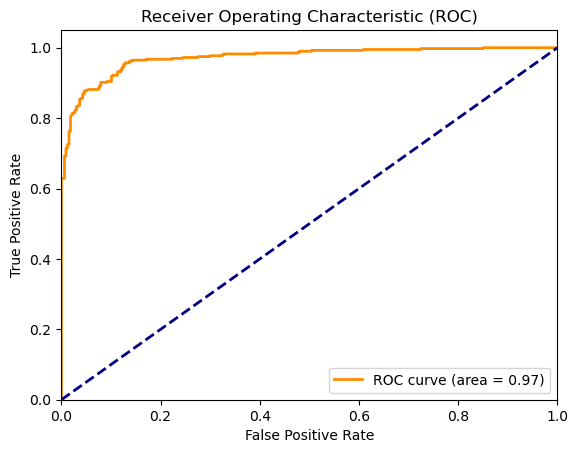

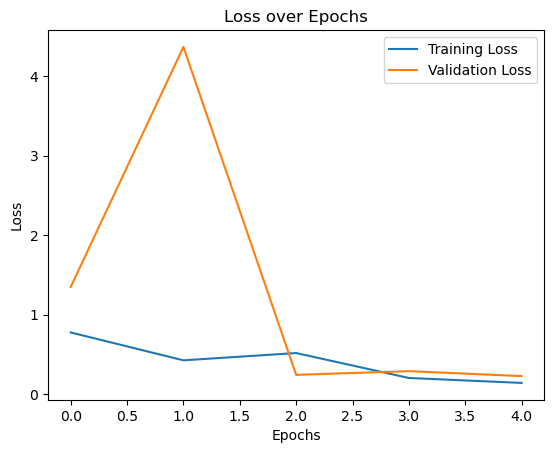

Accuracy: 0.8990318118948825
Precision: 0.8645598194130926
Recall: 0.9671717171717171
F1 Score: 0.9129916567342073
Confusion Matrix:
[[267  60]
 [ 13 383]]


NameError: name 'matthews_corrcoef' is not defined

In [3]:
import numpy as np
import pandas as pd
import cv2
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,matthews_corrcoef, confusion_matrix, roc_curve, auc,cohen_kappa_score
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Concatenate, Dense

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match MobileNet input shape

X_valid_resized = np.array([cv2.resize(img, (224, 224)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained MobileNet without top layer
base_model = MobileNet(weights='imagenet', include_top=False)
avg_pooling = GlobalAveragePooling2D()(base_model.output)
max_pooling = GlobalMaxPooling2D()(base_model.output)
x = Concatenate()([avg_pooling, max_pooling])
output = Dense(1, activation='sigmoid')(x)
model= Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=100, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)


# Calculate Matthews Correlation Coefficient
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, predicted_labels)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, predicted_labels)

# Calculate Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# Print Additional Metrics
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Save metrics to DataFrame
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Test Accuracy': test_accuracy * 100,
    'Test Loss': test_loss * 100,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    "Cohen's Kappa": kappa,
    'Matthews Correlation': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Execution Time (s)': execution_time
}
metrics_df = pd.DataFrame(metrics, index=[0])

# Save DataFrame to CSV
metrics_df.to_csv('FINAL_MOBILENET_without_ES.csv', index=False)

print("Metrics saved to metrics.csv file.")

In [26]:
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Save the model in the native Keras format with .keras extension
save_model(model, 'model_keras.keras')


In [24]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Assuming 'model_keras.keras' is your saved Keras model
model = load_model('model_keras.keras')

# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Unable to read image at {image_path}. Check the file path and file format.")
    img = cv2.resize(img, (224, 224))  # Assuming your model expects input size of 224x224
    img = img.astype(np.float32) / 255.0  # Normalize pixel values
    return img

# Sample image path for testing
sample_image_path = 'yes1.png'

# Preprocess the sample image
try:
    processed_image = preprocess_image(sample_image_path)
except ValueError as e:
    print(str(e))
    exit(1)

# Perform prediction using the loaded model
prediction = model.predict(np.expand_dims(processed_image, axis=0))
threshold = 0.5
predicted_class = 1 if prediction > threshold else 0

print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
Predicted Class: 1
